Trong phần này sẽ thay thế bóc tách từ tiếng việt từ underthesea thành Pyvi

In [1]:
!pip install pyvi

     |████████████████████████████████| 8.5 MB 5.0 MB/s 
     |████████████████████████████████| 743 kB 48.4 MB/s 


In [2]:
from sklearn import preprocessing
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from pyvi import ViTokenizer
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle
import nltk
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [3]:
data = pd.read_excel('/content/Data2.xlsx')
X= data["question"]
Y= data["answer"]
print("thuoc tinh dieu kien")
print(X)
print("thuoc tinh can du doan")
print(Y)

thuoc tinh dieu kien
0                                            Tạm biệt bot
1                                                 Goodbye
2                                    Tạm biệt mày nhé bot
3                                           Chào tạm biệt
4                                Ngày mai gặp lại nhé bot
                              ...                        
2419    ngành học nào là lựa chọn  tốt nhất trong khoa...
2420    phân biệt giữa ngành khoa học máy tính và ngàn...
2421    phân biệt, khác biệt, tốt nhất, đặc biệt, phân...
2422    Phân biệt giữa  các ngành học trong khoa công ...
2423    Nên lựa chọn ngành học nào trong khoa công ngh...
Name: question, Length: 2424, dtype: object
thuoc tinh can du doan
0                                                     bye
1                                                     bye
2                                                     bye
3                                                     bye
4                                         

In [4]:
#Tiep theo chung ta se ma hoa Y sao cho no hop ly
le = preprocessing.LabelEncoder()
le.fit(Y)

list_label = list(le.classes_)

print(list_label)
print(len(list_label))

label = le.transform(Y)
print(label)

['Chỉ tiêu xét tuyển ngành công nghệ thông tin: 390', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 120', 'Chỉ tiêu xét tuyển ngành hệ thống thông tin: 130', 'Chỉ tiêu xét tuyển ngành khoa học máy tính: 120', 'Chỉ tiêu xét tuyển ngành kỹ thuật phần mềm: 250', 'Các hoạt động ngoại khóa: CLB tin học, CLB Tiếng Anh, CLB tình nguyện, CLB văn nghệ,….', 'Các khoa thường xuyên tổ chức các chương trình văn nghệ thường niên các sinh viên giao lưu học hỏi', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.000', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.001', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.002', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.003', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.000 đến 550.004', 'Có 3 loại phòng kí túc xá: Phòng thường, chất lượng cao và vip. Giá từ 100.00

In [5]:
def tienxuly(document): 
    document = ViTokenizer.tokenize(document)
    # đưa về lower
    document = document.lower()
    # xóa các ký tự không cần thiết
    document = re.sub(r'[^\s\wáàảãạăắằẳẵặâấầẩẫậéèẻẽẹêếềểễệóòỏõọôốồổỗộơớờởỡợíìỉĩịúùủũụưứừửữựýỳỷỹỵđ_]',' ',document)
    # xóa khoảng trắng thừa
    document = re.sub(r'\s+', ' ', document).strip()
    return document

In [6]:
for i in range(0,X.count()):
  X[i] = tienxuly(X[i])

X

0                                            tạm_biệt bot
1                                                 goodbye
2                                    tạm_biệt mày nhé bot
3                                           chào tạm_biệt
4                                ngày_mai gặp lại nhé bot
                              ...                        
2419    ngành học nào là lựa_chọn tốt nhất trong khoa ...
2420    phân_biệt giữa ngành khoa_học máy_tính và ngàn...
2421    phân_biệt khác_biệt tốt nhất đặc_biệt phân_biệ...
2422    phân_biệt giữa các ngành học trong khoa công_n...
2423    nên lựa_chọn ngành học nào trong khoa công_ngh...
Name: question, Length: 2424, dtype: object

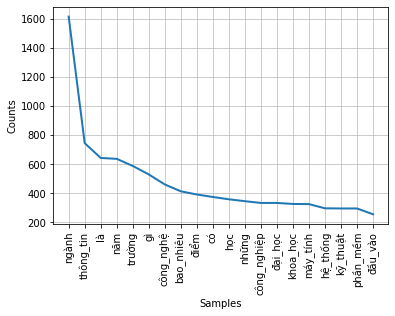

In [7]:
#chung ta se loai bo stop word trong van ban


#bay h dau tien minh muon biet cac stop word o dau va cho nao

#tokens = [t for t in text.split()]
tokens = []

for i in range(0,X.count()):
  for j in X[i].split():
    tokens.append(j)

freq = nltk.FreqDist(tokens)
freq.plot(20, cumulative=False)

In [8]:
#nhu vay chung ta biet mot so tu xuat hien xuat hien thuong xuyen va no se anh huong toi mo hinh can du doan
#chung ta se loai bo chung de cho model co do chinh xac cao hon

stopword = ["nghành","gì","là","trường","năm"]
 
def remove_stopwords(line):
    words = []
    for word in line.strip().split():
        if word not in stopword:
            words.append(word)
    return ' '.join(words)

print(X[4])
demo = remove_stopwords(X[4])
demo

ngày_mai gặp lại nhé bot


'ngày_mai gặp lại nhé bot'

In [9]:
for i in range(0,X.count()):
  X[i]= remove_stopwords(X[i])

In [10]:
#buoc tiep theo chung ta se xay dung bo tu dien cho may hoc
vectorizer = CountVectorizer()

def transform(data):
  data= list(data)
  return vectorizer.fit_transform(data).todense()

data1 = transform(X)

In [11]:
print(data1)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
#chia du lieu ra lam 2 phan
X_train, X_test, Y_train, Y_test = train_test_split(data1, label, test_size=0.1, random_state=0)
print(X_train)
print(X_test)
print(Y_train)
print(Y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[143 140  88 ...  82  85 126]
[139  82 136  98 144 106 133 107  66  69 106 102 141 127  47 122 147 108
 147 107 112  95  82 117  66  89 103  64  77  47  47 118 118 117 128  50
 129 107  87  97 105  64  83 102 111 133 134   5  73  33 137 113   3  90
  47 131 106 142  81 140  49 134  83 134 143 125  56  80  50  82  99 129
  78  49  49  46 138  43  69 114 104 115 144 110  60 136  88  52 114  86
  97 130  57  46  30 146  56 117 123 123 118   0   4  47  56 140  50  89
  84  65  50  77  56  84 110  77  46  97   3  74  71 138 143 137  53 105
  77 118 129 105 122  68  85 118 140  84 105  50  55 138 114  96  79  81
  42 122  64 113  56 120  83 123  98  82 133  36 144  96  53  95 140  71
   3  73  55 126 142 105  87  73 130 145 118  85 123 118 123  96 110  63


In [13]:
X_test.shape

(243, 593)

In [14]:
#khoi tao mo hinh
#chung ta se dung loai mo hinh multinomial Naive Bayes de phan loai

clf= MultinomialNB()
scores = cross_val_score(clf, X_train, Y_train, cv=5)
print("%0.2f  accuracy with a standard deviation of %0.2f" % (scores.mean()*100, scores.std()))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


78.40  accuracy with a standard deviation of 0.02


In [15]:
#dua du lieu vao cho model hoc
clf.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [16]:
#kiem tra voi du lieu testing xem do chinh xac cua no la bao nhieu

prediction = clf.predict(X_test)
print("Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: ")
accuracy_score(Y_test, prediction)

Độ chính xác so với dữ liệu dự đoán và dữ liệu test là: 


0.7654320987654321

In [17]:
#bay h se luu file tu vung lai de dung cho sau nay

pickle.dump(vectorizer.vocabulary_, open('vocab.pkl', 'wb')) #luu lai
pickle.dump(clf, open('NB_ChatBot_model.pkl', 'wb')) #luu model lai
#luu cach ma hoa cua nhan lai
pickle.dump(le, open('decode_label.pkl', 'wb'))